01-PortlandFinalStorm.csv 63.756608575131516
02-BostonFinalStorm.csv 79.21281649710836
03-NewportFinalStorm.csv 43.80292226939722
04-MontaukFinalStorm.csv 121.91297276624323
05-The BatteryFinalStorm.csv 95.76024003803565
06-Sandy HookFinalStorm.csv 86.98505936306769
07-Atlantic City-FinalStorm.csv 126.54454391000634
08-Sewells PtFinalStorm.csv 177.94302759131196
09-Wilmington NCFinalStorm.csv 30.376853794118674
10-Charleston SCFinalStorm.csv 40.64198378407489
11-Fernandina BeachFinalStorm.csv 51.714508994909025
12-Key WestFinalStorm.csv 26.239718106661257
Portland
Incomplete data for years:  [1923, 1934, 1935, 1936, 1946, 1956, 1957, 1959, 1961, 1970, 1971, 1990]
Boston
Incomplete data for years:  [1921, 1945, 1974]
Newport
Incomplete data for years:  [1938, 1943, 1946, 1955, 1966, 1967, 1971, 1973, 1974]
Montauk
Incomplete data for years:  [1947, 1959, 1966, 1967, 1969, 1970, 1971, 1972, 1974, 1977, 1982, 1991, 1993, 1994, 2000, 2003, 2004, 2005, 2006]
The Battery
Incomplete data for 

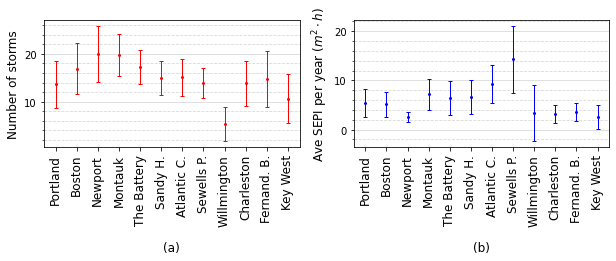

In [2]:
## Adding a subplot c to plot the overall average of all CSII values
# October 17, 2023

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import shutil
import numpy as np
from plot_config import font_family, font_size, label_size, label_list
import csv
from dateutil import parser


# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
dir_path = os.path.join(parent_dir, 'Annual_SEPI_Results')
missing_dir_path = os.path.join(parent_dir, 'Results_Missing_Data')
dir_path2 = os.path.join(parent_dir, 'Final_Storm_Results')

# Create output folder
folder_name = current_dir
os.makedirs(folder_name, exist_ok=True)
output_path1 = os.path.join(folder_name, "storms_per_station_ave.png")
output_path2 = os.path.join(folder_name, "SEPI_per_year_ave.png")
output_path3 = os.path.join(folder_name, "storms_per_Station_BW.png")
output_path4 = os.path.join(folder_name, "SEPI_per_year_BW.png")
output_path5 = os.path.join(folder_name, "Ave_SEPI_per_year.png")

# Convert millimeters to inches
mm_to_inch = 0.0393701
fig_width_mm = 110
fig_height_mm = 140


fig_width_inch = fig_width_mm * mm_to_inch
fig_height_inch = fig_height_mm * mm_to_inch

# Create the figure with the specified size in millimeters
#plt.figure(figsize=(fig_width_inch, fig_height_inch))

# Get a list of all CSV files in the directory
file_names = [f for f in os.listdir(dir_path) if f.endswith('.csv')]
missing_file_names = [f for f in os.listdir(missing_dir_path) if f.endswith('.csv')]
file_names2 = [f for f in os.listdir(dir_path2) if f.endswith('.csv')]

file_names = sorted(file_names)
file_names2 = sorted(file_names2)
missing_file_names = sorted(missing_file_names)  
#label_list = ["Portland", "Boston", "Newport", "Montauk", "The Battery", "Sandy H.", "Atlantic C.", "Sewell's P.", "Willmington", "Charleston", "Fernand. B.", "Key West"]

# Data from Number of Storms"
ave_vals = []
st_devs = []

# Data from "Total SEPI"
SEPI_ave_vals = []
SEPI_st_devs = []

# Copy the data into an array to calculate further stats for Box and Whiskers Plot
number_data = []
SEPI_data = []

# Ave SEPI per year data
Ave_Annual_SEPI_data = []
Ave_Annual_SEPI_ave_vals = []
Ave_Annual_SEPI_st_devs = []

Overall_Ave_CSII_vals = []
Overall_St_Dev_CSII_vals = []


#Calcs for CSIIs
# Make plots for all stations with a single delta value
delta = 0.3
delta_str = str(delta).replace('.', '-')

for i, file_name in enumerate(file_names2):
    #print(file_name)
    #print("Color = ", colors[i % len(colors)])
    #print(label_list[i % len(label_list)])

    if file_name.endswith(".csv"):
        filepath = os.path.join(dir_path2, file_name)
        with open(filepath) as f:
            reader = csv.reader(f)
            next(reader)  # skip the header row
            dates = []
            sepi = []
            tp = []
            result = []

            for row in reader:
                date = parser.parse(row[0]).date()
                sepi_val = float(row[1])
                tp_val = float(row[2])
                dates.append(date)
                sepi.append(sepi_val)
                tp.append(tp_val)
                
        tau_p = [t / 365 for t in tp]
        csii = [sepi[0]]
        for j in range(1, len(sepi)):
            csii_val = sepi[j] + csii[j-1] * delta ** tau_p[j]
            csii.append(csii_val)
        
        ave_csii_val = np.mean(csii)
        st_dev_csii_val = np.std(csii)
        print(file_name, ave_csii_val)
        Overall_Ave_CSII_vals.append(ave_csii_val)
        Overall_St_Dev_CSII_vals.append(st_dev_csii_val)
        
        #for num in csii:
        #    result.append(num + vertical_offset)
        #plt.plot(dates, result, marker='o', markersize = 1.0, color=colors[i % len(colors)], linewidth = .5, label=label_list[i], linestyle = "None")
        #vertical_offset -= 300.0
        #i += 1

# Calcs for Annual Data
for i, file_name in enumerate(file_names):

    m_file_name = missing_file_names[i]
    print(m_file_name[3:-12])
    
    # Load the CSV file into a pandas dataframe
    df = pd.read_csv(os.path.join(dir_path, file_name))
    mdf = pd.read_csv(os.path.join(missing_dir_path, m_file_name))

    # Clean the column names
    df.columns = df.columns.str.strip().copy()
    mdf.columns = mdf.columns.str.strip().copy()
    
    total_num_points = 8760
    thr = .1 * 8760        # Only keep if 90% of the data is present
    mdf.loc[:, 'Threshold'] = mdf['# of Missing points'].apply(lambda x: True if x < thr else False).copy()

    # Create an empty list to store the years that satisfy the condition
    years_to_skip = []

    # Iterate through the DataFrame and check the condition
    for index, row in mdf.iterrows():
        if row['Threshold'] is False:
            years_to_skip.append(row['Year'])
            
    #print("Number of Years to Skip = ", len(years_to_skip))
    print("Incomplete data for years: ", years_to_skip)
    
    # Filter the rows of df using the list of years to skip
    df_filtered = df.loc[~df['Year'].isin(years_to_skip)]
    
    ave_storms = df_filtered['Number of Storms'].mean()
    ave_vals.append(ave_storms)
    stdev = df_filtered['Number of Storms'].std()
    st_devs.append(stdev)
    
    SEPI_ave = df_filtered['Total SEPI'].mean()
    SEPI_ave_vals.append(SEPI_ave)
    
    SEPI_stdev = df_filtered['Total SEPI'].std()
    SEPI_st_devs.append(SEPI_stdev)
    
    number_data.append(df_filtered['Number of Storms'])
    SEPI_data.append(df_filtered['Total SEPI'])

    # Calculate average value of SEPI per year = total value of annual SEPI / total annual number of storms
    Ave_Annual_SEPI_data = df_filtered['Total SEPI'] / df_filtered['Number of Storms']
    Ave_Annual_SEPI_ave = Ave_Annual_SEPI_data.mean()
    Ave_Annual_SEPI_ave_vals.append(Ave_Annual_SEPI_ave)
    Ave_Annual_SEPI_std = Ave_Annual_SEPI_data.std()
    Ave_Annual_SEPI_st_devs.append(Ave_Annual_SEPI_std)

fig, axs = plt.subplots(1, 2, figsize=(2 * fig_width_inch, fig_height_inch))  # Updated to create three subplots



# Plot the first plot on the left (a)
x = range(len(label_list))
axs[0].errorbar(x, ave_vals, yerr=st_devs, marker='o', markersize=2.0, capsize=2.0, linestyle="None", ecolor='red', markerfacecolor='none', markeredgecolor='red', linewidth=1.0)
axs[0].grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
axs[0].yaxis.set_minor_locator(plt.MultipleLocator(2))
axs[0].grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
axs[0].yaxis.set_major_locator(plt.MultipleLocator(10))
axs[0].set_xticks(x)
axs[0].set_xticklabels(label_list, rotation='vertical', fontsize=12)
axs[0].set_ylabel("Number of storms", fontsize=12)
axs[0].tick_params(axis='y', labelsize=10)

# Add the (a) label at the bottom of the first plot
axs[0].text(0.5, -0.82, "(a)", transform=axs[0].transAxes, fontsize=12, ha="center")

# Plot the fifth plot on the right (b)
axs[1].errorbar(x, Ave_Annual_SEPI_ave_vals, yerr=Ave_Annual_SEPI_st_devs, marker='o', markersize=2.0, capsize=2.0, linestyle="None", ecolor='blue', markerfacecolor='none', markeredgecolor='blue', linewidth=1.0)
axs[1].grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
axs[1].yaxis.set_minor_locator(plt.MultipleLocator(2))
axs[1].grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
axs[1].yaxis.set_major_locator(plt.MultipleLocator(10))
axs[1].set_xticks(x)
axs[1].set_xticklabels(label_list, rotation='vertical', fontsize=12)
axs[1].set_ylabel("Ave SEPI per year ($m^2 \cdot h$)", fontsize=12)
axs[1].tick_params(axis='y', labelsize=10)

# Add the (b) label at the bottom of the second plot
axs[1].text(0.5, -0.82, "(b)", transform=axs[1].transAxes, fontsize=12, ha="center")

# Plot the third plot on the right (c), which is the same as (b)
#axs[2].errorbar(x, Overall_Ave_CSII_vals, yerr=Overall_St_Dev_CSII_vals, marker='o', markersize=2.0, capsize=2.0, linestyle="None", ecolor='green', markerfacecolor='none', markeredgecolor='green', linewidth=1.0)
#axs[2].grid(True, which='minor', axis='y', alpha=0.5, linestyle='--')
#axs[2].yaxis.set_minor_locator(plt.MultipleLocator(20))
#axs[2].grid(True, which='major', axis='y', alpha=0.5, linestyle='-')
#axs[2].yaxis.set_major_locator(plt.MultipleLocator(100))
#axs[2].set_xticks(x)
#axs[2].set_xticklabels(label_list, rotation='vertical', fontsize=12)
#axs[2].set_ylabel("Overall Ave. CSII ($m^2 h$)", fontsize=12)
#axs[2].tick_params(axis='y', labelsize=10)

# Add the (c) label at the bottom of the third plot
#axs[2].text(0.5, -0.82, "(c)", transform=axs[2].transAxes, fontsize=12, ha="center")


# Adjust layout spacing
plt.tight_layout()

# Save the figure
combined_output_path = os.path.join(folder_name, "fig06.png")
plt.savefig(combined_output_path, dpi=300, bbox_inches='tight')

# Show the figure
plt.show()
plt.close()
